# Axis Minor Ticks

The `axis_minor_ticks` and `axis_minor_ticks_length` parameters in `theme()` control
the appearance of axis minor ticks, i.e., the tick marks drawn between major ticks.

* `axis_minor_ticks` - tick line attributes set via `element_line()`
* `axis_minor_ticks_length` - tick length in pixels
* `axis_minor_ticks_x` / `axis_minor_ticks_y`, `axis_minor_ticks_length_x` / `axis_minor_ticks_length_y` -
directional overrides allow controlling only horizontal or vertical axes.

Minor ticks are placed at positions computed by the scale (e.g., midpoints between major breaks
for continuous scales). They do not carry labels as for now.


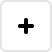
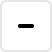
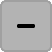
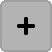
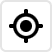
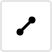
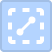
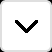
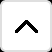
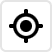
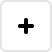
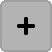
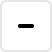
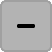
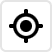
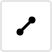
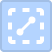
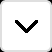
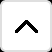
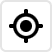

In [1]:
from lets_plot import *
import numpy as np
import pandas as pd
from scipy.stats import norm

LetsPlot.setup_html()

## General Usage
Minor ticks can improve readability of continuous axes, especially when major breaks are sparse.

In [2]:
# Generate sample data from a normal distribution
np.random.seed(42)
x = np.random.normal(loc=0, scale=1, size=2000)
df_hist = {'x': x}

# Smooth density curve
xs = np.linspace(-4, 4, 400)
density = norm.pdf(xs) * 400   # scale to match histogram roughly
df_curve = {'xs': xs, 'density': density}

plot_norm = ggplot() + \
    geom_histogram(aes(x='x'), bins=40, color='white', fill='light_sky_blue', alpha=0.7, data=df_hist) + \
    geom_line(aes(x='xs', y='density'), color='tomato', size=1.2, data=df_curve) + \
    scale_x_continuous(breaks=[-3, -2, -1, 0, 1, 2, 3]) + \
    labs(title="Normal Distribution",
         x="Value",
         y="Count / Density")
plot_norm

In [3]:
plot_norm + \
    ggtitle("Normal Distribution with Minor Ticks") + \
    theme(
        axis_ticks_length=8,
    
        axis_minor_ticks=element_line(color='gray85'),
        axis_minor_ticks_length=5,
    
        axis_minor_ticks_x=element_line(color='gray66', size=2),
    ) 

## Minor Ticks as Separators

Minor ticks can be styled as vertical separators, helping distinguish categories more clearly.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')
df["state"] = df["state"].map({
    "IL": "Illinois",
    "IN":" Indiana",
    "MI": "Michigan",
    "OH": "Ohio",
    "WI": "Wisconsin",
})
print(df.shape)


(437, 29)


In [5]:
base_plot = ggplot(df) + \
    geom_jitter(aes("state", "poptotal"), seed=42, alpha=0.3) + \
    ggtitle("Population Distribution by State") + \
    theme_gray()
base_plot

In [6]:
base_plot + \
    ggtitle("Minor ticks as separators") + \
    theme(
        # disable major ticks
        axis_ticks_x=element_blank(),
        
        # and add enlarged minor ticks
        axis_minor_ticks_length_x=15.0,

        axis_minor_ticks_x=element_line(
            color="grey"
        )
    )